## Backtesting 

### Store Metrics/Plot Visualisations here

In [69]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt

sys.path.append('..')
from strategies.mean_reversion import MeanReversionStrat, Trade
from utilities.api_client import APIClient
from strategies.indicators import rsi, bb, atr, std_dev

# Load config
with open('../config.json', 'r') as f:
    config = json.load(f)

# Initialize backtest parameters
INITIAL_BALANCE_USDT = 10000  # Starting with 10k USDT
TRADING_FEES = 0.001  # 0.1% maker/taker fee on Binance



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
class Backtest:
    def __init__(self, strategy: MeanReversionStrat):
        self.strategy = strategy
        self.equity_curve = [{
            'timestamp': strategy.env.get_current_time(),
            'equity': strategy.env.get_equity(position=strategy.pos, pos_size=strategy.pos_size)
        }]

    def run(self):
        #make for loop until no more data left with update period function
        while self.strategy.env.get_current_data() is not None:
            signal = self.strategy.gen_signal()

            # yea this is stupid but for readability
            if signal != "flat":
                trade = self.strategy.enter_position(signal)
                self.strategy.save_trade(trade, 'trades/mean_reversion_trades.csv')

            # self.times.append(self.strategy.env.get_current_time())
            self.equity_curve.append({
                'timestamp': self.strategy.env.get_current_time(),
                'equity': self.strategy.env.get_equity(position=self.strategy.pos, pos_size=self.strategy.pos_size)
            })
            print('timestamp: ', self.strategy.env.get_current_time())
            print('equity: ', self.strategy.env.get_equity(position=self.strategy.pos, pos_size=self.strategy.pos_size))
            self.strategy.env.update_period()


    def plot_equity_curve(self):
        equity_df = pd.DataFrame(self.equity_curve)
        plt.plot(equity_df['timestamp'], equity_df['equity'])
        plt.show()

### Historical Data Retrieval

First, we connect to the $\texttt{ccxt}$ API to access historical OHLCV data of our chosen pairs.

In [71]:
from keys import API_KEY, API_SECRET

client = APIClient(config, API_KEY, API_SECRET)
client.exchange.enableRateLimit = True
client.exchange.options['adjustForTimeDifference'] = True
historical_data = client.fetch_ohlcv_df('BTC/USDT', period=1000)
display(historical_data)

,timestamp,open,high,low,close,volume
0,2022-03-13,38807.35,39310.00,37578.51,37777.34,32791.823590
1,2022-03-14,37777.35,39947.12,37555.00,39671.37,46945.453750
2,2022-03-15,39671.37,39887.61,38098.33,39280.33,46015.549260
3,2022-03-16,39280.33,41718.00,38828.48,41114.00,88120.761670
4,2022-03-17,41114.01,41478.82,40500.00,40917.90,37189.380870
...,...,...,...,...,...,...
995,2024-12-02,97185.17,98130.00,94395.00,95840.62,37958.669810
996,2024-12-03,95840.61,96305.52,93578.17,95849.69,35827.322830
997,2024-12-04,95849.69,99000.00,94587.83,98587.32,43850.537280
998,2024-12-05,98587.32,104088.00,90500.00,96945.63,109921.729662


### Initialising a Mean Reversion Strategy

,timestamp,open,high,low,close,volume
0,2022-03-13,38807.35,39310.00,37578.51,37777.34,32791.823590
1,2022-03-14,37777.35,39947.12,37555.00,39671.37,46945.453750
2,2022-03-15,39671.37,39887.61,38098.33,39280.33,46015.549260
3,2022-03-16,39280.33,41718.00,38828.48,41114.00,88120.761670
4,2022-03-17,41114.01,41478.82,40500.00,40917.90,37189.380870
...,...,...,...,...,...,...
95,2022-06-16,22583.72,22995.73,20232.00,20401.31,99673.594290
96,2022-06-17,20400.60,21365.43,20246.66,20468.81,86694.336630
97,2022-06-18,20468.81,20792.06,17622.00,18970.79,196441.655524
98,2022-06-19,18970.79,20815.95,17960.41,20574.00,128320.875950


current time 2022-06-20 00:00:00
current period 0
no signal
timestamp:  2022-06-20 00:00:00
equity:  10000
current time 2022-06-21 00:00:00
current period 1
no signal
timestamp:  2022-06-21 00:00:00
equity:  10000
current time 2022-06-22 00:00:00
current period 2
no signal
timestamp:  2022-06-22 00:00:00
equity:  10000
current time 2022-06-23 00:00:00
current period 3
no signal
timestamp:  2022-06-23 00:00:00
equity:  10000
current time 2022-06-24 00:00:00
current period 4
no signal
timestamp:  2022-06-24 00:00:00
equity:  10000
current time 2022-06-25 00:00:00
current period 5
no signal
timestamp:  2022-06-25 00:00:00
equity:  10000
current time 2022-06-26 00:00:00
current period 6
no signal
timestamp:  2022-06-26 00:00:00
equity:  10000
current time 2022-06-27 00:00:00
current period 7
no signal
timestamp:  2022-06-27 00:00:00
equity:  10000
current time 2022-06-28 00:00:00
current period 8
no signal
timestamp:  2022-06-28 00:00:00
equity:  10000
current time 2022-06-29 00:00:00
curr

c:\Users\fatda\OneDrive\Documents\Projects\trading-algo\backtesting\..\strategies\mean_reversion.py:129: RuntimeWarning: overflow encountered in scalar multiply
  fees = size * self.get_current_bid(symbol) * TAKER_FEE
c:\Users\fatda\OneDrive\Documents\Projects\trading-algo\backtesting\..\strategies\mean_reversion.py:137: RuntimeWarning: overflow encountered in scalar multiply
  self.update_balance(size * self.get_current_ask(symbol)-fees)
c:\Users\fatda\OneDrive\Documents\Projects\trading-algo\backtesting\..\strategies\mean_reversion.py:137: RuntimeWarning: invalid value encountered in scalar subtract
  self.update_balance(size * self.get_current_ask(symbol)-fees)
c:\Users\fatda\OneDrive\Documents\Projects\trading-algo\backtesting\..\strategies\mean_reversion.py:275: RuntimeWarning: overflow encountered in scalar multiply
  self.env.update_balance(multiplier * (trade.size * trade.price) - fees)
c:\Users\fatda\OneDrive\Documents\Projects\trading-algo\backtesting\..\strategies\mean_rever

current time 2023-11-07 00:00:00
current period 505
exit short
timestamp:  2023-11-07 00:00:00
equity:  nan
current time 2023-11-08 00:00:00
current period 506
exit long
timestamp:  2023-11-08 00:00:00
equity:  nan
current time 2023-11-09 00:00:00
current period 507
exit short
timestamp:  2023-11-09 00:00:00
equity:  nan
current time 2023-11-10 00:00:00
current period 508
exit long
timestamp:  2023-11-10 00:00:00
equity:  nan
current time 2023-11-11 00:00:00
current period 509
exit short
timestamp:  2023-11-11 00:00:00
equity:  nan
current time 2023-11-12 00:00:00
current period 510
exit long
timestamp:  2023-11-12 00:00:00
equity:  nan
current time 2023-11-13 00:00:00
current period 511
exit short
timestamp:  2023-11-13 00:00:00
equity:  nan
current time 2023-11-14 00:00:00
current period 512
exit long
timestamp:  2023-11-14 00:00:00
equity:  nan
current time 2023-11-15 00:00:00
current period 513
exit short
timestamp:  2023-11-15 00:00:00
equity:  nan
current time 2023-11-16 00:00:00

c:\Users\fatda\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\ticker.py:2119: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


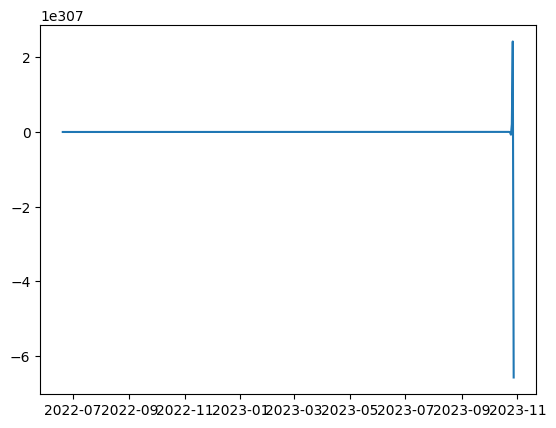

In [72]:



strategy = MeanReversionStrat(config=config,
                              env_type='backtest',
                              initial_balance=INITIAL_BALANCE_USDT,
                              data=historical_data)
print(strategy.env)
display(strategy.env.get_current_data())

first_test = Backtest(strategy)
first_test.run()
first_test.plot_equity_curve()



In [73]:
class Backtest:
    def __init__(self, strategy, data, initial_balance):
        self.strategy = strategy
        self.data = data
        self.balance = initial_balance
        self.positions = []
        self.trades = []
        self.equity_curve = []
        
    def run(self):
        # Iterate through each day in the data
        for i in range(len(self.data)):
            current_data = self.data.iloc[:i+1]
            if len(current_data) < 20:  # Need enough data for indicators
                continue
                
            # Get signal from strategy
            signal = self.strategy.gen_signal(current_data)
            
            # Execute trades based on signal
            if signal != 0:
                # Calculate position size based on risk management
                size = self.strategy.pos_size
                
                # Include trading fees
                fee = size * current_data.iloc[-1]['close'] * TRADING_FEES
                
                # Execute trade
                self.strategy.execute_trade(signal, current_data, size)
                
                # Update balance
                self.balance -= fee
            
            # Record equity at this point
            total_equity = self.balance
            if self.strategy.pos != 0:
                # Add unrealized P&L if we have an open position
                current_price = current_data.iloc[-1]['close']
                total_equity += self.strategy.pos_size * current_price
                
            self.equity_curve.append({
                'timestamp': current_data.iloc[-1]['timestamp'],
                'equity': total_equity
            })
            
    def get_results(self):
        equity_df = pd.DataFrame(self.equity_curve)
        
        # Calculate basic metrics
        total_return = (equity_df['equity'].iloc[-1] - INITIAL_BALANCE_AUD) / INITIAL_BALANCE_AUD
        
        # Calculate drawdown
        equity_df['peak'] = equity_df['equity'].cummax()
        equity_df['drawdown'] = (equity_df['peak'] - equity_df['equity']) / equity_df['peak']
        max_drawdown = equity_df['drawdown'].max()
        
        return {
            'total_return': total_return,
            'max_drawdown': max_drawdown,
            'num_trades': len(self.strategy.trades),
            'equity_curve': equity_df
        }

# Fetch historical data
client = APIClient(config, "", "")  # Empty strings for API keys since we're just backtesting
historical_data = client.fetch_ohlcv_df('BTC/AUD')

# Initialize strategy
strategy = MeanReversionStrat(config=config, api_key="", api_secret="")

# Run backtest
backtest = Backtest(strategy, historical_data, INITIAL_BALANCE_AUD)
backtest.run()

# Get and display results
results = backtest.get_results()
print(f"Total Return: {results['total_return']*100:.2f}%")
print(f"Max Drawdown: {results['max_drawdown']*100:.2f}%")
print(f"Number of Trades: {results['num_trades']}")

# Plot equity curve
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results['equity_curve']['timestamp'], results['equity_curve']['equity'])
plt.title('Equity Curve')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (AUD)')
plt.grid(True)
plt.show()


TypeError: APIClient.fetch_ohlcv_df() missing 1 required positional argument: 'period'